In [4]:
from hydromt.data_adapter.rasterdataset import RasterDatasetAdapter
import dotenv

# load environment variables to get AWS credentials
dotenv.load_dotenv(dotenv.find_dotenv())

# create a raster dataset adapter so we can fetch data from the cloud
rda = RasterDatasetAdapter(
    crs= 4326,
  driver= "raster",
  filesystem="s3",
  storage_options={"anon": False},
  chunks={"x": 6000, "y": 6000},
  path="s3://hydromt-data/topography/merit_hydro/*.vrt",
  rename= {
    "bas": "basins",
    "dir": "flwdir",
    "elv": "elevtn",
    "slp": "lndslp",
    "sto": "strord",
    "upa": "uparea",
    "upg": "upgrid",
    "wth": "rivwth"
  }
  )


In [9]:
# slice a dataset with coordinates from the netherlands
dataset = rda.get_data(bbox=[2.2652056, 50.131475, 8.970739, 54.0862969])

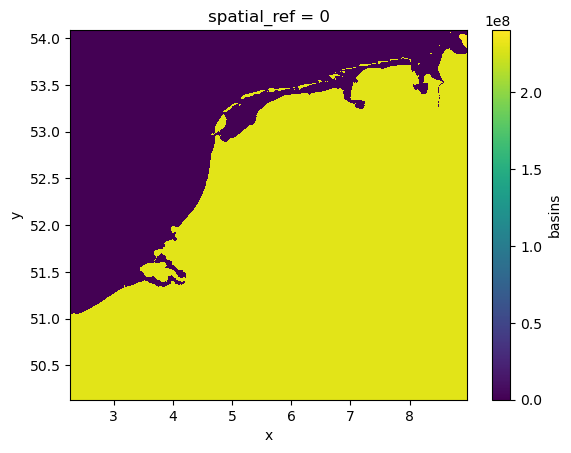

In [10]:
# plot the basins from the sliced dataset to fetch all data from the cloud

dataset['basins'].plot()

In [11]:
# check data array properties
dataset['basins']
# X-array states the size is ~145MB

<xarray.DataArray 'basins' (y: 4746, x: 8047)>
dask.array<getitem, shape=(4746, 8047), dtype=uint32, chunksize=(4746, 4765), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float64 2.265 2.266 2.267 2.268 ... 8.968 8.969 8.97 8.97
  * y            (y) float64 54.09 54.09 54.08 54.08 ... 50.13 50.13 50.13 50.13
    spatial_ref  int64 0
Attributes:
    _FillValue:   0
    source_file:  bas.vrt